# Obligatorisk innlevering 2 - oppgave 2

I denne oppgaven skal vi forsøke å forutsi oppsigelser ved en arbeidsplass basert på en rekke variabler som f.eks alder, kjønn, utdannelse, lønn, osv.

In [ ]:
# inspired from https://github.com/Bsingstad/DMBA-ML/

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett2.csv")

### Preprosessering:
For å forenkle håndteringen av kategoriske data har jeg her skrevet noe kode som gjør om strenger til intergers

Følgende kolonner er formatert som *object* og inneholder kategoriske variabler i form av strenger

In [3]:
kolonner_obj = df.select_dtypes(include=['object']).columns
print(kolonner_obj)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


I koden under omformer jeg strengene til integers og gir dere "nøkkelen" til å konvertere det tilbake igjen

In [4]:
for i in kolonner_obj:
    print("-----------")
    print(i)
    print("-----------")
    for num, j in enumerate(list(df[i].unique())):
        print("{} = {}".format(j,num))
        df[i].loc[df[i]==j] = num
    df[i] = pd.to_numeric(df[i])

-----------
BusinessTravel
-----------
Travel_Frequently = 0
Travel_Rarely = 1
Non-Travel = 2
-----------
Department
-----------
Research & Development = 0
Sales = 1
Human Resources = 2
-----------
EducationField
-----------
Medical = 0
Other = 1
Marketing = 2
Life Sciences = 3
Technical Degree = 4
Human Resources = 5
-----------
Gender
-----------
Male = 0
Female = 1
-----------
JobRole
-----------
Laboratory Technician = 0
Sales Representative = 1
Sales Executive = 2
Healthcare Representative = 3
Manager = 4
Manufacturing Director = 5
Research Scientist = 6
Human Resources = 7
Research Director = 8
-----------
MaritalStatus
-----------
Married = 0
Divorced = 1
Single = 2
-----------
Over18
-----------
Y = 0
-----------
OverTime
-----------
Yes = 0
No = 1


C:\Users\Tareq\AppData\Local\Temp\ipykernel_12392\3482823818.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].loc[df[i]==j] = num
C:\Users\Tareq\AppData\Local\Temp\ipykernel_12392\3482823818.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].loc[df[i]==j] = num
C:\Users\Tareq\AppData\Local\Temp\ipykernel_12392\3482823818.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].loc[df[i]==j] = num
C:\Users\Tareq\AppData

I outputen fra koden nedenfor viser datatypen til de forskjellige kolonnene, som nå etter preprosesseringen bare består av integers (int64). 

In [5]:
print(df.dtypes)

id                          int64
Age                         int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalanc

In [6]:
# Her deler jeg datasettet inn i egenskaper (X) og target (y) (fjerner også den første kolonnen siden det bare er en ID 
# og har dermed ingen prediktiv verdi)

X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

# PS: Ikke endre denne kodecellen!

#### Oppgave 2.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? Begrunn svaret

In [7]:
# X_train

In [8]:
# X_test

In [9]:
# y_train

In [10]:
# y_test

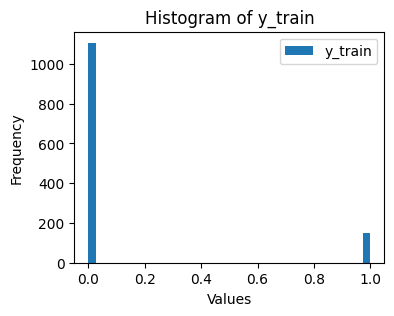

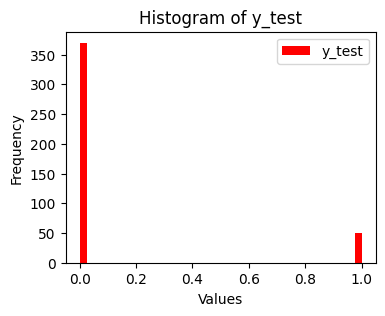

In [11]:
#TODO: visualiser y_train og y_test i et histogram
import matplotlib.pyplot as plt

# Plot a histogram for y_train
plt.figure(figsize=(4, 3))
plt.hist(y_train, bins=40, label='y_train')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of y_train')
plt.legend()
plt.show()

# Plot a histogram for y_test
plt.figure(figsize=(4, 3))
plt.hist(y_test, bins=40, color='red', label='y_test')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of y_test')
plt.legend()
plt.show()

**Svar:**

*< The data in y_train and y_test show that we need to work on a binary classification task because we aim to predict "Attrition" for different employees, whether an employee resigns from the company (0) or not (1).

So, we need to build a classification model to predict whether an employee, based on their specifications, will continue with the company or not. >*

#### Oppgave 2.2)
Velg to modeller og gjør repeterte kryssvalideringer $(10)$ med $K=5$
* Velg hvorvidt du vil bruke "default" hyperparamtre for modellene eller om du vil gjøre et hyperparametersøk
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene skriftlig til slutt 


In [12]:
#TODO: repeterte kryssvalideringer for to modeller part 1

from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Initialize RepeatedKFold with 5 splits and 10 repeats
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

# Lists F1-scores 
f1_score_log_reg = []
f1_score_mlp = []

# Create instances of the models
logreg = LogisticRegression(solver='lbfgs', max_iter=5000)
mlp = MLPClassifier(random_state=1, max_iter=5000, solver="sgd", learning_rate="adaptive")

# Loop repeated cross-validation
for i, (train_index, val_index) in enumerate(rkf.split(X_train)):
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train - predict Logistic Regression
    logreg.fit(X_train_cv, y_train_cv)
    y_val_hat_log_reg = logreg.predict_proba(X_val_cv)[:, 1]
    score_log_reg = f1_score(y_val_cv, (y_val_hat_log_reg > 0.5).astype(int), average='binary').round(2)
    f1_score_log_reg.append(score_log_reg)

    # Train - predict MLP
    mlp.fit(X_train_cv, y_train_cv)
    y_val_hat_mlp = mlp.predict_proba(X_val_cv)[:, 1]
    score_mlp = f1_score(y_val_cv, (y_val_hat_mlp > 0.5).astype(int), average='binary').round(2)
    f1_score_mlp.append(score_mlp)


E:\Projects_H2023\DMBA_2023\DMBA-ML_oblig2_2023\DMBA-ML_oblig2_2023\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Projects_H2023\DMBA_2023\DMBA-ML_oblig2_2023\DMBA-ML_oblig2_2023\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    h

In [13]:
#TODO: repeterte kryssvalideringer for to modeller part 2
# mean - standard deviation F1-scores
log_reg_mean = np.asarray(f1_score_log_reg).mean().round(3)
log_reg_std = np.asarray(f1_score_log_reg).std().round(3)
mlp_mean = np.asarray(f1_score_mlp).mean().round(3)
mlp_std = np.asarray(f1_score_mlp).std().round(3)

print("Logistic Regression: Mean F1-score = {} ± {}".format(log_reg_mean, log_reg_std))
print("MLP: Mean F1-score = {} ± {}".format(mlp_mean, mlp_std))
print("p-verdi = ",ttest_ind(np.asarray(f1_score_log_reg), np.asarray(f1_score_mlp), axis=0,equal_var=True, alternative="two-sided")[1].round(7))

Logistic Regression: Mean F1-score = 0.28 ± 0.092
MLP: Mean F1-score = 0.0 ± 0.0
p-verdi =  0.0


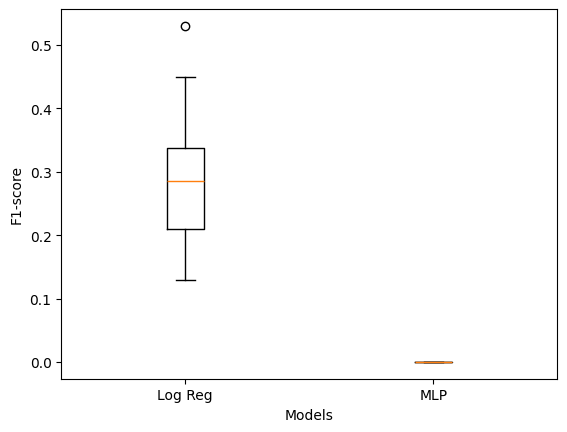

In [14]:
#TODO: repeterte kryssvalideringer for to modeller part 3
# Visualize F1-scores using a box plot
plt.boxplot([np.asarray(f1_score_log_reg), np.asarray(f1_score_mlp)])
#plt.ylim(0.8, 1.05)
plt.xticks([1, 2], ["Log Reg", "MLP"])
plt.ylabel("F1-score")
plt.xlabel("Models")
plt.show()

**Svar:**

*< Both Logistic Regression and MLP models have low F1-scores, with Logistic Regression performing better. The MLP model may not be suitable for classification tasks. The p-value for the T-test is very low for both models. To improve performance, we can adjust hyperparameters or use imbalanced learn and SMOTE techniques to balance the data. >*

#### Oppgave 2.3) 
Tren de samme modellene men denne gangen med et balansert datasett
* Bruk imbalaced learn og SMOTE til å oppsample minioritetsklassen (bare oppsample treningsdataene i kryssvalideringen - ikke valideringsdataene)
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene og sammenlign resultatene med 2.2) 

In [15]:
#TODO: repeterte kryssvalideringer for de samme to modellene som i oppgave 2.2, men denne gangen med SMOTE-oppsampling 
#from imblearn.over_sampling import SMOTE

In [16]:
# !pip install -U imbalanced-learn

In [17]:
#TODO: repeterte kryssvalideringer for de samme to modellene som i oppgave 2.2, men denne gangen med SMOTE-oppsampling 
# par 1
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import numpy as np
from imblearn.over_sampling import SMOTE
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Initialize RepeatedKFold with 5 splits and 10 repeats
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

# Lists  F1-scores 
f1_score_log_reg = []
f1_score_mlp = []

# Instances of the models
logreg = LogisticRegression(solver='lbfgs', max_iter=5000)
mlp = MLPClassifier(random_state=1, max_iter=5000, solver="sgd", learning_rate="adaptive")

# repeated cross-validation
for i, (train_index, val_index) in enumerate(rkf.split(X_train)):
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    # Upsampling using SMOTE
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_cv_resampled, y_train_cv_resampled = smote.fit_resample(X_train_cv, y_train_cv)

    # Train - predict Logistic Regression - balanced dataset
    logreg.fit(X_train_cv_resampled, y_train_cv_resampled)
    y_val_hat_log_reg = logreg.predict_proba(X_val_cv)[:, 1]
    score_log_reg = f1_score(y_val_cv, (y_val_hat_log_reg > 0.5).astype(int), average='binary').round(2)
    f1_score_log_reg.append(score_log_reg)

    # Train - predict MLP - balanced dataset
    mlp.fit(X_train_cv_resampled, y_train_cv_resampled)
    y_val_hat_mlp = mlp.predict_proba(X_val_cv)[:, 1]
    score_mlp = f1_score(y_val_cv, (y_val_hat_mlp > 0.5).astype(int), average='binary').round(2)
    f1_score_mlp.append(score_mlp)


E:\Projects_H2023\DMBA_2023\DMBA-ML_oblig2_2023\DMBA-ML_oblig2_2023\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Projects_H2023\DMBA_2023\DMBA-ML_oblig2_2023\DMBA-ML_oblig2_2023\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    h

In [18]:
#TODO: repeterte kryssvalideringer for de samme to modellene som i oppgave 2.2, men denne gangen med SMOTE-oppsampling 
# par 2
# Mean and standard deviation F1-scores
log_reg_mean = np.asarray(f1_score_log_reg).mean().round(3)
log_reg_std = np.asarray(f1_score_log_reg).std().round(3)
mlp_mean = np.asarray(f1_score_mlp).mean().round(3)
mlp_std = np.asarray(f1_score_mlp).std().round(3)

print("Logistic Regression: Mean F1-score = {} ± {}".format(log_reg_mean, log_reg_std))
print("MLP: Mean F1-score = {} ± {}".format(mlp_mean, mlp_std))
print("p-verdi = ",ttest_ind(np.asarray(f1_score_log_reg), np.asarray(f1_score_mlp), axis=0,equal_var=True, alternative="two-sided")[1].round(7))

Logistic Regression: Mean F1-score = 0.422 ± 0.078
MLP: Mean F1-score = 0.213 ± 0.031
p-verdi =  0.0


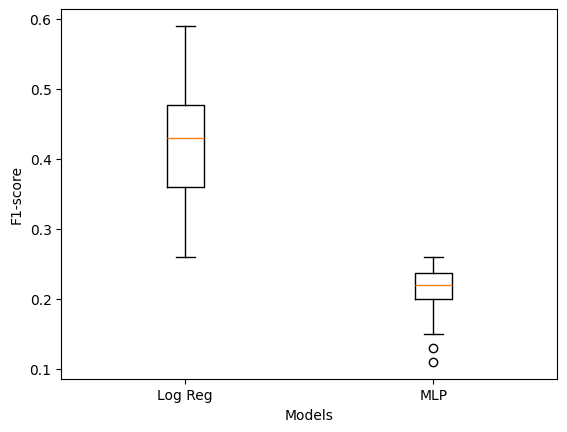

In [19]:
#TODO: repeterte kryssvalideringer for de samme to modellene som i oppgave 2.2, men denne gangen med SMOTE-oppsampling 
# par 3
# Visualize F1-scores - box plot
plt.boxplot([np.asarray(f1_score_log_reg), np.asarray(f1_score_mlp)])
#plt.ylim(0.8, 1.05)
plt.xticks([1, 2], ["Log Reg", "MLP"])
plt.ylabel("F1-score")
plt.xlabel("Models")
plt.show()

**Svar:**

*< Balancing the dataset with SMOTE improved F1-scores for Logistic Regression and MLP, indicating that the imbalance was impacting the models. Logistic Regression outperformed MLP even on the balanced dataset, showing it's more suitable for the classification task. The low P-value suggests no change in performance difference between the models. >*

#### Oppgave 2.4)
Tren den beste modellen på nytt og utfør prediksjon på testsettet. Mål nå ytelsen på testsettet ved bruk av sensitivitet, spesifisitet og presisjon, itillegg til F1-skår og accuracy

Accuracy =  0.83
F1-score =  0.42
Sensitivity =  0.5
Specificity =  0.88
Precision =  0.36


E:\Projects_H2023\DMBA_2023\DMBA-ML_oblig2_2023\DMBA-ML_oblig2_2023\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


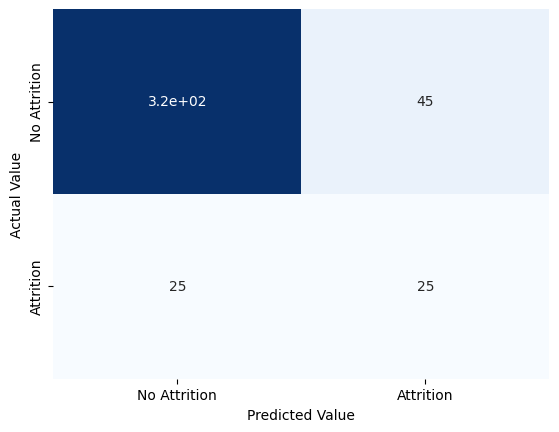

In [21]:
#TODO: Tren den beste modellen fra 2.2 og 2.3 på alle treningsdataene og test på testdataene
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import seaborn as sns

best_model = logreg

# Train  model
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

best_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_test = best_model.predict(X_test)


# Calculate metrics
accuracy = accuracy_score(y_test, (y_pred_test > 0.5).astype(int)).round(2)
f1 = f1_score(y_test, (y_pred_test > 0.5).astype(int)).round(2)
sensitivity = recall_score(y_test, (y_pred_test > 0.5).astype(int), pos_label=1).round(2)
specificity = recall_score(y_test, (y_pred_test > 0.5).astype(int), pos_label=0).round(2)
precision = precision_score(y_test, (y_pred_test > 0.5).astype(int)).round(2)

# Print metrics
print("Accuracy = ", accuracy)
print("F1-score = ", f1)
print("Sensitivity = ", sensitivity)
print("Specificity = ", specificity)
print("Precision = ", precision)

# Display confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test,(y_pred_test>0.5)*1), annot=True, cbar=False, cmap="Blues")
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")
plt.xticks([0.5, 1.5], ["No Attrition", "Attrition"])
plt.yticks([0.5, 1.5], ["No Attrition", "Attrition"])
plt.show()


#### Oppgave 2.5)
Del opp testsettet basert på kjønn og gjør en analyse av sensitivitet, spesifisitet og presisjon for menn og det samme for kvinner. Skriv ut og diskuter resultatet og forsøk å svar på følgende spørsmål:
* Er modellen like god for begge kjønn? 
* Hvis ikke, hva tror du er årsaken og hvilke tiltak kan vi gjøre for å forbedre modellen? 

Metrics for Males:
Accuracy =  0.79
F1-score =  0.41
Sensitivity =  0.5
Specificity =  0.84
Precision =  0.35

Metrics for Females:
Accuracy =  0.89
F1-score =  0.44
Sensitivity =  0.5
Specificity =  0.93
Precision =  0.39


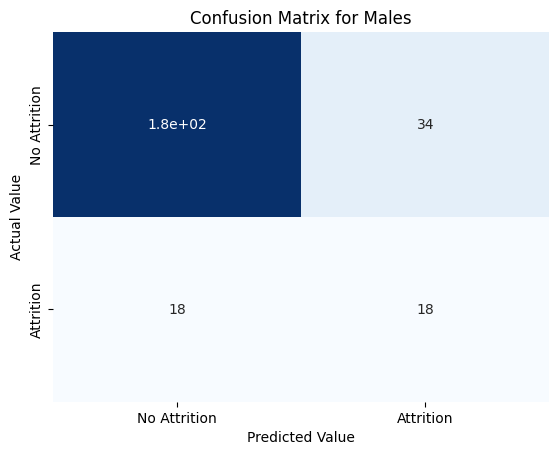


---------------------



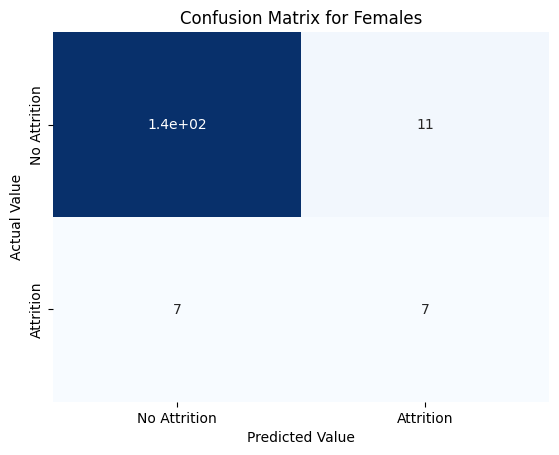

In [22]:
#TODO: Gjør kjønnsbasert analyse på testdataene

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import seaborn as sns

# Split test part based on gender
test_set_male = X_test[X_test["Gender"] == 0]
test_set_female = X_test[X_test["Gender"] == 1]

# Prediction males and females for best model
y_test_hat_male = best_model.predict(test_set_male)
y_test_hat_female = best_model.predict(test_set_female)

# metrics for males
accuracy_male = accuracy_score(y_test[test_set_male.index], (y_test_hat_male > 0.5).astype(int)).round(2)
f1_male = f1_score(y_test[test_set_male.index], (y_test_hat_male > 0.5).astype(int)).round(2)
sensitivity_male = recall_score(y_test[test_set_male.index], (y_test_hat_male > 0.5).astype(int), pos_label=1).round(2)
specificity_male = recall_score(y_test[test_set_male.index], (y_test_hat_male > 0.5).astype(int), pos_label=0).round(2)
precision_male = precision_score(y_test[test_set_male.index], (y_test_hat_male > 0.5).astype(int)).round(2)

# metrics for females
accuracy_female = accuracy_score(y_test[test_set_female.index], (y_test_hat_female > 0.5).astype(int)).round(2)
f1_female = f1_score(y_test[test_set_female.index], (y_test_hat_female > 0.5).astype(int)).round(2)
sensitivity_female = recall_score(y_test[test_set_female.index], (y_test_hat_female > 0.5).astype(int), pos_label=1).round(2)
specificity_female = recall_score(y_test[test_set_female.index], (y_test_hat_female > 0.5).astype(int), pos_label=0).round(2)
precision_female = precision_score(y_test[test_set_female.index], (y_test_hat_female > 0.5).astype(int)).round(2)

# Print males
print("Metrics for Males:")
print("Accuracy = ", accuracy_male)
print("F1-score = ", f1_male)
print("Sensitivity = ", sensitivity_male)
print("Specificity = ", specificity_male)
print("Precision = ", precision_male)

# Print females
print("\nMetrics for Females:")
print("Accuracy = ", accuracy_female)
print("F1-score = ", f1_female)
print("Sensitivity = ", sensitivity_female)
print("Specificity = ", specificity_female)
print("Precision = ", precision_female)

# confusion matrix - males and females

sns.heatmap(confusion_matrix(y_test[test_set_male.index], (y_test_hat_male > 0.5).astype(int)), annot=True, cbar=False, cmap="Blues")
plt.title("Confusion Matrix for Males")
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")
plt.xticks([0.5, 1.5], ["No Attrition", "Attrition"])
plt.yticks([0.5, 1.5], ["No Attrition", "Attrition"])
plt.show()
print("")
print("---------------------")
print("")

sns.heatmap(confusion_matrix(y_test[test_set_female.index], (y_test_hat_female > 0.5).astype(int)), annot=True, cbar=False, cmap="Blues")
plt.title("Confusion Matrix for Females")
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")
plt.xticks([0.5, 1.5], ["No Attrition", "Attrition"])
plt.yticks([0.5, 1.5], ["No Attrition", "Attrition"])

plt.show()


**Svar:**

*< 
 - The result of the two models are not equals. The model is more accurate for females and better at distinguishing between positive and negative classes compared to males.
 - The lower performance for males indicates that the model is not as effective in capturing patterns or features indicative of attrition in males.
 - As shown in the following code, there is a gender imbalance in the dataset. To balance it, we can either provide more representative samples for both genders or remove some male rows.
>*

In [24]:
# Split df based on gender
df_male = df[df["Gender"] == 0]
df_female = df[df["Gender"] == 1]

# number of rows for male and female
num_rows_male = df_male.shape[0]
num_rows_female = df_female.shape[0]

# Print the number of rows in each set
print("Number of rows in df_male:", num_rows_male)
print("Number of rows in df_female:", num_rows_female)

Number of rows in df_male: 1064
Number of rows in df_female: 613


Kjør denne cellen til slutt og legg ved den genererte requirements.txt fila i pull requestet

In [25]:
!pip freeze > requirements.txt